# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=b80b812b958635d6555e35bf4d1958ea'

In [5]:
# set up lists to have info from response
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass


Processing record 1 of Set 1 | puerto ayora
Processing record 2 of Set 1 | tezu
Processing record 3 of Set 1 | prabumulih
Processing record 4 of Set 1 | vaini
Processing record 5 of Set 1 | punta arenas
Processing record 6 of Set 1 | saint-philippe
Processing record 7 of Set 1 | albany
Processing record 8 of Set 1 | saint-augustin
Processing record 9 of Set 1 | longyearbyen
Processing record 10 of Set 1 | killam
Processing record 11 of Set 1 | leningradskiy
Processing record 12 of Set 1 | mar del plata
Processing record 13 of Set 1 | hay river
Processing record 14 of Set 1 | hermanus
Processing record 15 of Set 1 | walvis bay
Processing record 16 of Set 1 | georgetown
Processing record 17 of Set 1 | mantua
Processing record 18 of Set 1 | jamestown
Processing record 19 of Set 1 | umea
Processing record 20 of Set 1 | ostrovnoy
Processing record 21 of Set 1 | pitimbu
Processing record 22 of Set 1 | banjar
Processing record 23 of Set 1 | mujiayingzi
Processing record 24 of Set 1 | astoria


Processing record 192 of Set 1 | alta floresta
Record not found
Processing record 193 of Set 1 | vila velha
Processing record 194 of Set 1 | tena
Processing record 195 of Set 1 | conceicao do araguaia
Processing record 196 of Set 1 | san patricio
Processing record 197 of Set 1 | ouallam
Processing record 198 of Set 1 | caborca
Processing record 199 of Set 1 | goragorskiy
Processing record 200 of Set 1 | tirunelveli
Processing record 201 of Set 1 | honiara
Processing record 202 of Set 1 | sisimiut
Processing record 203 of Set 1 | lanzhou
Processing record 204 of Set 1 | jiazi
Record not found
Record not found
Processing record 205 of Set 1 | vao
Processing record 206 of Set 1 | waipawa
Processing record 207 of Set 1 | tete
Processing record 208 of Set 1 | kiama
Processing record 209 of Set 1 | fortuna
Processing record 210 of Set 1 | xiazhen
Processing record 211 of Set 1 | ayagoz
Processing record 212 of Set 1 | pelym
Processing record 213 of Set 1 | beringovskiy
Processing record 214 

Processing record 381 of Set 1 | gazojak
Processing record 382 of Set 1 | aborlan
Processing record 383 of Set 1 | torbat-e jam
Processing record 384 of Set 1 | boqueirao
Processing record 385 of Set 1 | ereymentau
Processing record 386 of Set 1 | zaza del medio
Processing record 387 of Set 1 | mocuba
Processing record 388 of Set 1 | raudeberg
Processing record 389 of Set 1 | taksimo
Processing record 390 of Set 1 | japura
Processing record 391 of Set 1 | kilindoni
Processing record 392 of Set 1 | rodez
Processing record 393 of Set 1 | bilibino
Processing record 394 of Set 1 | ilo
Processing record 395 of Set 1 | senador jose porfirio
Processing record 396 of Set 1 | vertientes
Processing record 397 of Set 1 | solnechnyy
Processing record 398 of Set 1 | altay
Processing record 399 of Set 1 | mahibadhoo
Processing record 400 of Set 1 | marrakesh
Processing record 401 of Set 1 | kieta
Processing record 402 of Set 1 | sargur
Processing record 403 of Set 1 | pastavy
Processing record 404 o

Processing record 568 of Set 1 | chatrapur
Processing record 569 of Set 1 | ambulu


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert JSONs to Pandas DataFrame

weather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,76.96,76,25,10.76,EC,1650823200
1,Tezu,27.9167,96.1667,68.00,79,87,4.72,IN,1650823200
2,Prabumulih,-3.4500,104.2500,75.90,93,100,2.26,ID,1650823200
3,Vaini,-21.2000,-175.2000,77.97,94,75,3.62,TO,1650823200
4,Punta Arenas,-53.1500,-70.9167,44.71,81,75,5.97,CL,1650823200


In [7]:
# Export into a csv
weather_data.to_csv(r'my_weather_data.csv')
# Show Record Count
countforme = len(weather_data)
countforme

569

In [8]:
# Display the City Data Frame
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,76.96,76,25,10.76,EC,1650823200
1,Tezu,27.9167,96.1667,68.00,79,87,4.72,IN,1650823200
2,Prabumulih,-3.4500,104.2500,75.90,93,100,2.26,ID,1650823200
3,Vaini,-21.2000,-175.2000,77.97,94,75,3.62,TO,1650823200
4,Punta Arenas,-53.1500,-70.9167,44.71,81,75,5.97,CL,1650823200


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

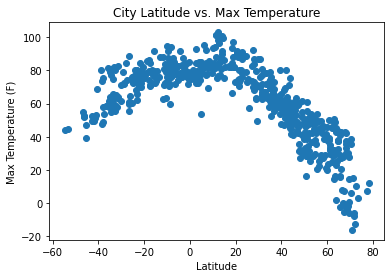

In [11]:
#Build SCatter plot for Latitude vs Temperature
scatlat = weather_data["Latitude"]
scattemp = weather_data["Max Temp"]

plt.scatter(scatlat,scattemp)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('scatplotlatitudemaxtemp')
plt.show()

## Latitude vs. Humidity Plot

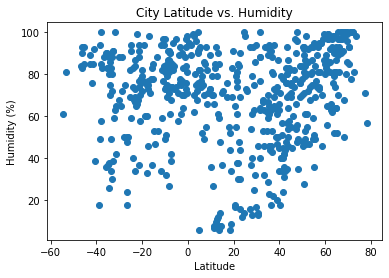

In [12]:
# Build scatter plot for Laatitude vs Humidity
scathum = weather_data["Humidity"]

plt.scatter(scatlat,scathum)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('scatplotlatitudehumidity')
plt.show()

## Latitude vs. Cloudiness Plot

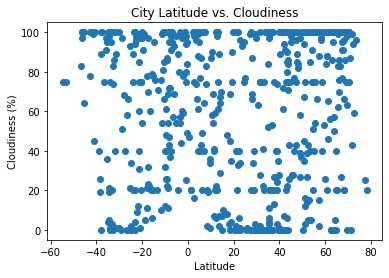

In [13]:
#Build Scatter plot for Latitude vs Cloudiness
scatcloud = weather_data["Cloudiness"]

plt.scatter(scatlat,scatcloud)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('scatplotlatitudecloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

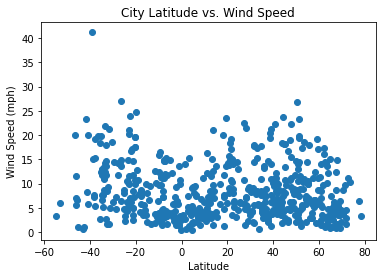

In [14]:
# Build the scatter plots for latitude vs. wind speed
scatwindsp = weather_data["Wind Speed"]

plt.scatter(scatlat,scatwindsp)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('scatplotlatitudewindspeed')
plt.show()

## Linear Regression

In [15]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [16]:
# Create Dataframe for Northern and Southern Hemisphere
northlat_df = weather_data.loc[weather_data["Latitude"] >= 0,:]
southlat_df = weather_data.loc[weather_data["Latitude"] < 0,:]

northlat_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Tezu,27.9167,96.1667,68.00,79,87,4.72,IN,1650823200
6,Albany,42.6001,-73.9662,64.04,34,91,8.61,US,1650823200
7,Saint-Augustin,51.2260,-58.6502,38.89,84,100,19.48,CA,1650823200
8,Longyearbyen,78.2186,15.6401,12.04,57,20,3.36,SJ,1650823200
9,Killam,52.7834,-111.8518,53.55,47,15,5.55,CA,1650823200


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8779041965601422


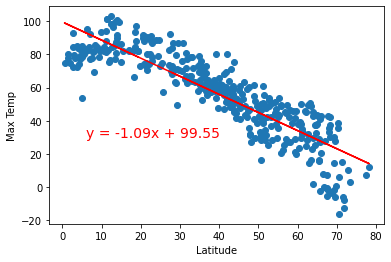

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northerntemplat')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7076925746694039


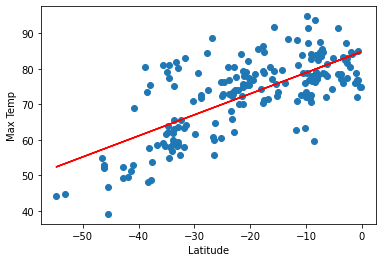

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southerntemplat')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3187271212955083


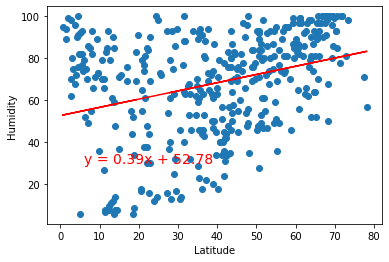

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northernhumlat')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09215362569258338


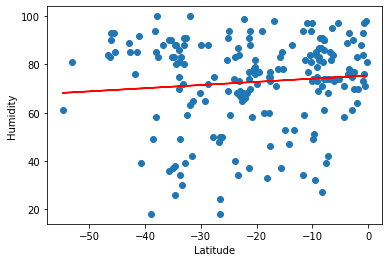

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southernhumlat')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17790485328566238


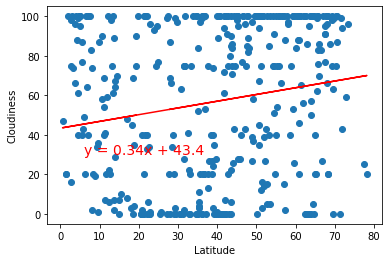

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northerncloudlat')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10214803470015459


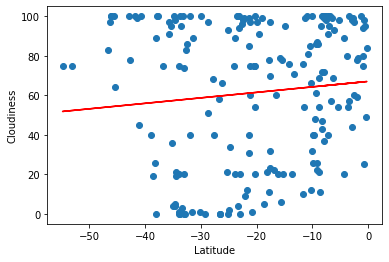

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southerncloudlat')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.029313153284591612


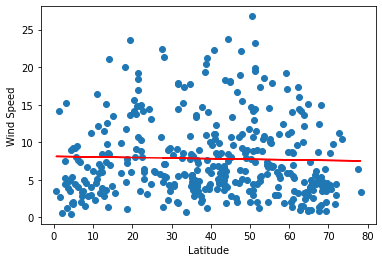

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = northlat_df["Latitude"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northernwindlat')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.30737633103562223


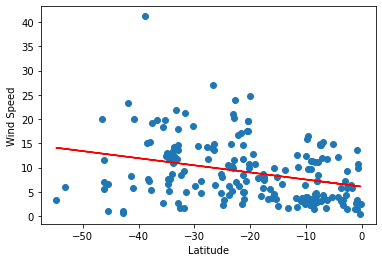

<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southlat_df["Latitude"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernwindlat')